# Ejercicio1 - Busqueda de Alojamiento en Airbnb (Jupyter).

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [12]:
import pandas as pd
df_airbnb = pd.read_csv("./data/airbnb.csv")

In [13]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Ejercicios

### 1. Realizar Análisis Exploratorio de los datos

Sobre este apartado deberá explorar los datos como se vio en clase .. aplicar métodos shape, columns, etc

In [1]:
import pandas as pd

data = pd.read_csv('data/airbnb.csv')

# Mostrar las primeras 5 filas
print(data.head(5))

# Mostrar la forma del dataframe
print(data.shape)

# Mostrar los nombres de las columnas
print(data.columns)

# Describir los datos
print(data.describe())


   room_id  host_id        room_type       neighborhood  reviews  \
0     6499    14455  Entire home/apt              Belém        8   
1    17031    66015  Entire home/apt           Alvalade        0   
2    25659   107347  Entire home/apt  Santa Maria Maior       63   
3    29248   125768  Entire home/apt  Santa Maria Maior      225   
4    29396   126415  Entire home/apt  Santa Maria Maior      132   

   overall_satisfaction  accommodates  bedrooms  price  
0                   5.0             2       1.0   57.0  
1                   0.0             2       1.0   46.0  
2                   5.0             3       1.0   69.0  
3                   4.5             4       1.0   58.0  
4                   5.0             4       1.0   67.0  
(13232, 9)
Index(['room_id', 'host_id', 'room_type', 'neighborhood', 'reviews',
       'overall_satisfaction', 'accommodates', 'bedrooms', 'price'],
      dtype='object')
            room_id       host_id       reviews  overall_satisfaction  \
count

### 2. Realizar Filtrados a Datos

- Realizar filtrados, según sea el caso. 


Nota: 
Para obtener el top de un conjunto de datos debemos aplicar un head(n) además de ordenar los datos

#### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [23]:

import pandas as pd

df = pd.read_csv('/workspaces/PC5/data/airbnb.csv')

# Filtrar los datos según los requisitos
filtered_df = df[(df['reviews'] > 10) & (df['overall_satisfaction'] > 4) & (df['bedrooms'] >= 2)]

# Ordenar los datos
sorted_df = filtered_df.sort_values(by=['overall_satisfaction', 'reviews'], ascending=[False, False])

# Obtener las tres mejores opciones
top_options = sorted_df.head(3)

# Mostrar resultados
print(top_options)




     room_id  host_id        room_type       neighborhood  reviews  \
120   176153   842219  Entire home/apt       Misericórdia      438   
16     44043   192830  Entire home/apt  Santa Maria Maior      316   
140   202150   989393  Entire home/apt  Santa Maria Maior      274   

     overall_satisfaction  accommodates  bedrooms  price  
120                   5.0             4       2.0  102.0  
16                    5.0             7       3.0   80.0  
140                   5.0             4       2.0   62.0  


#### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [28]:
import pandas as pd
df_airbnb = pd.read_csv('/workspaces/PC5/data/airbnb.csv')
df_airbnb.head()

propiedades = df_airbnb[(df_airbnb['room_id'] == 97503) | (df_airbnb['room_id'] == 90387)]

print(propiedades)

propiedades.to_excel('roberto.xlsx', index=False)





    room_id  host_id     room_type   neighborhood  reviews  \
41    90387   490050  Private room  Santo António      204   
48    97503   515924  Private room  Santo António       39   

    overall_satisfaction  accommodates  bedrooms  price  
41                   5.0             2       1.0   46.0  
48                   4.0             2       1.0   26.0  



#### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [29]:

import pandas as pd

data = pd.read_csv('data/airbnb.csv')

# Filtrar por precio y tipo de habitación
filtered_data = data[(data['price'] <= 50) & (data['room_type'] == 'Shared room')]

# Ordenar por puntuación (de mayor a menor)
sorted_data = filtered_data.sort_values(by='reviews', ascending=False)

# Obtener las 10 propiedades más baratas
top_10_properties = sorted_data.head(10)

print(top_10_properties)



       room_id   host_id    room_type    neighborhood  reviews  \
7034  12268067  66077974  Shared room         Arroios       96   
1141   1365083   6401752  Shared room         Areeiro       51   
7643  13190640  73826302  Shared room         Arroios       51   
3102   4631891  22066144  Shared room         Marvila       50   
7060  12299998  66077974  Shared room         Arroios       49   
2608   3648252   6401752  Shared room         Areeiro       48   
4921   7737202  40574313  Shared room  Avenidas Novas       44   
1010   1179457   5799522  Shared room   Santo António       42   
9437  15447778  73826302  Shared room         Arroios       41   
7066  12305540  66077974  Shared room         Arroios       40   

      overall_satisfaction  accommodates  bedrooms  price  
7034                   5.0             1       1.0   16.0  
1141                   4.5             4       1.0   18.0  
7643                   4.5             6       1.0   13.0  
3102                   4.5       

### 3. Realizar Agrupamientos de Datos


- Según su criterio, aplicar 2 tipos de agrupamientos a los datos brindados. 
- **Opcional**, averiguar como realizar el gráfico de los 2 agrupamientos de los datos realizados. Se podría emplear librerias como mathplot y searbon ... ayudarse de chatgtp, etc


   room_id  host_id        room_type       neighborhood  reviews  \
0     6499    14455  Entire home/apt              Belém        8   
1    17031    66015  Entire home/apt           Alvalade        0   
2    25659   107347  Entire home/apt  Santa Maria Maior       63   
3    29248   125768  Entire home/apt  Santa Maria Maior      225   
4    29396   126415  Entire home/apt  Santa Maria Maior      132   

   overall_satisfaction  accommodates  bedrooms  price  
0                   5.0             2       1.0   57.0  
1                   0.0             2       1.0   46.0  
2                   5.0             3       1.0   69.0  
3                   4.5             4       1.0   58.0  
4                   5.0             4       1.0   67.0  
         room_type       price
0  Entire home/apt  101.338181
1     Private room   45.629967
2      Shared room   34.397661
               neighborhood       price
0                     Ajuda   63.435185
1                 Alcântara   72.582160
2    

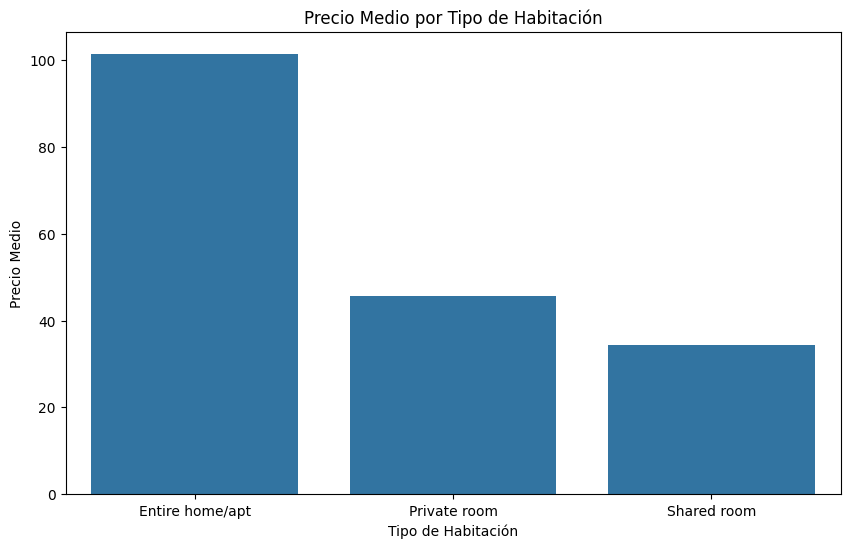

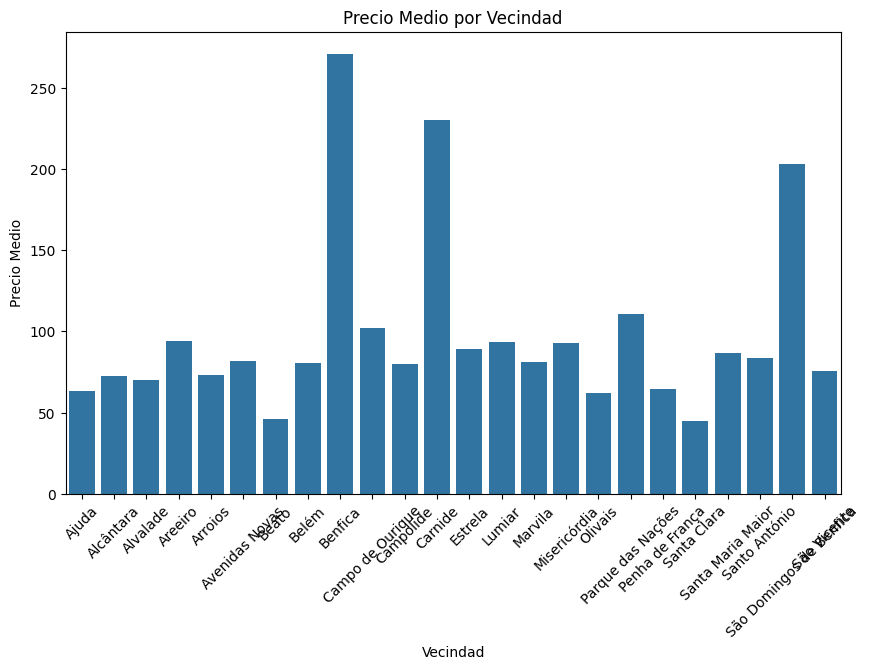

In [30]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_airbnb = pd.read_csv("/workspaces/PC5/data/airbnb.csv")

print(df_airbnb.head())

#### Agrupamiento 1: Precio medio por tipo de habitación

precio_por_tipo = df_airbnb.groupby('room_type')['price'].mean().reset_index()
print(precio_por_tipo)

#### Agrupamiento 2: Precio medio por vecindad

precio_por_vecindad = df_airbnb.groupby('neighborhood')['price'].mean().reset_index()
print(precio_por_vecindad)

#### Gráfico 1: Precio medio por tipo de habitación

plt.figure(figsize=(10, 6))
sns.barplot(x='room_type', y='price', data=precio_por_tipo)
plt.title('Precio Medio por Tipo de Habitación')
plt.xlabel('Tipo de Habitación')
plt.ylabel('Precio Medio')
plt.show()


#### Gráfico 2: Precio medio por vecindad

plt.figure(figsize=(10, 6))
sns.barplot(x='neighborhood', y='price', data=precio_por_vecindad)
plt.title('Precio Medio por Vecindad')
plt.xlabel('Vecindad')
plt.ylabel('Precio Medio')
plt.xticks(rotation=45)
plt.show()
